# Regression

  * In this project I have to deal with the problem of regression and finding optimal hyperparameters.
    
## Data source

  * The data source is a file `LifeExpectancyData.csv` (original here: https://www.kaggle.com/kumarajarshi/life-expectancy-who).
  * The target (explained) variable is called `Life expectancy `.

## Data: basic overview

In [1]:
import pandas as pd
import numpy as np

# suppress scientific float notation (so 0.000 is printed as 0.)
np.set_printoptions(precision=5, suppress=True)

In [2]:
data = pd.read_csv('LifeExpectancyData.csv')

In [3]:
print('data shape: ' + str(data.shape))
display(data.head())
display(data.info())
display(data.describe())
display(data.nunique())

data shape: (2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

None

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

#### Familiarize myself with the data visually.

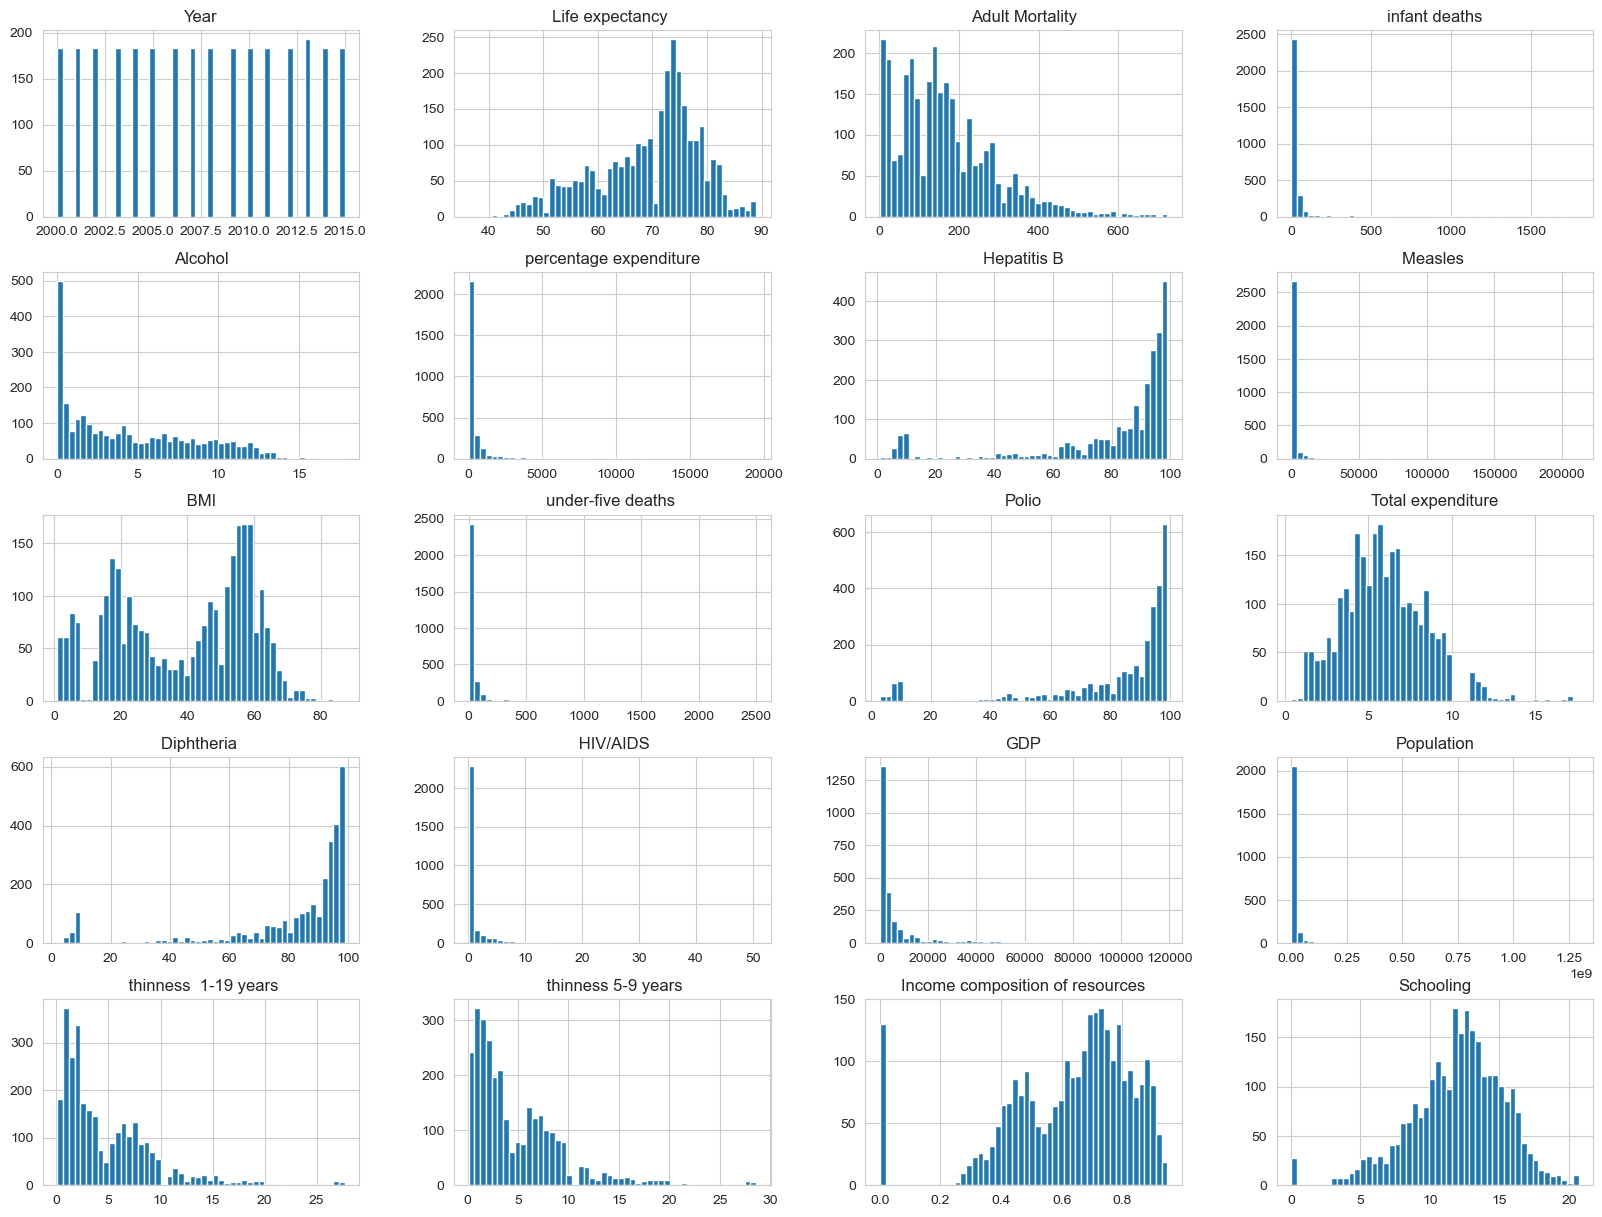

In [4]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

data.hist(bins=50, figsize=(20,15))
plt.show()

#### The quantitative ratio of developing countries to countries that have already achieved their development.

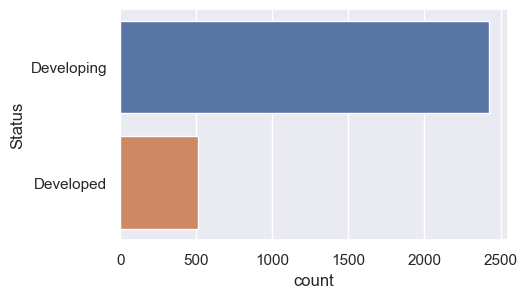

In [5]:
import seaborn as sns

sns.set(rc={'figure.figsize':(5,3)})
dev = data.Status
sns.countplot(y=dev, data=data)
plt.show()

* The graph shows that there are many more countries that are in their development phase than there are countries that already developed. The number of `developing` countries is almost five times greater than the number of already `developed` countries.

#### Heatmap

In [6]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


From the heatmap I draw the following conclusions:

* `percentage expenditure` and `GDP` are quite highly correlated (0.899370).
* `infant deaths` is highly correlated with `under-five deaths` (0.996628), which can tell us that these two variables carry almost identical information.

Redundant symptoms are those that carry the same information. In addition to unnecessarily increasing dimensionality, they can be downright harmful to some models, such as the collinearity problem in linear regression. 

In [7]:
data = data.drop('infant deaths', axis=1)

* I've tried removing the other attributes with a high correlation, which led to a slight deterioration in the following indicators: `RMSE` and `MAE`. After playing with those attributes, I abandoned the idea of removing the other attributes, stopping at removing the attribute with the highest correlation to the other - `infant deaths`.
 * By removing this attribute, model prediction became a little higher.

### Motivation: Why Is Data Exploration Important?
Exploration allows for deeper understanding of a dataset, making it easier to navigate and use the data later. The better we knows the data we’re working with, the better our analysis will be.

Now that I understand the meaning of each attribute, I can take a deeper look into the dataset itself, to learn from the distribution of the attributes and their possible relationships and interdependencies.

## Data preparation before using the model

### Rename keys

In [8]:
data.keys()

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

I see that the key names are written with spaces, so I change the keys by removing the spaces.
Also, some keys start with a small letter, which is out of place in the general style of key writing.

In [9]:
data.rename(columns = {'Life expectancy ':'Life expectancy',
                       'infant deaths':'Infant deaths',
                       'percentage expenditure':'Percentage expenditure',
                       'Measles ':'Measles',
                       ' BMI ':'BMI',
                       'under-five deaths ':'Under-five deaths',
                       'Diphtheria ':'Diphtheria',
                       ' HIV/AIDS':'HIV/AIDS',
                       ' thinness  1-19 years':'Thinness 1-19 years',
                       ' thinness 5-9 years':'Thinness 5-9 years'
                       }, inplace = True)

In [10]:
data.keys()

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'Alcohol', 'Percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'Under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

### Remove data points from the dataset for which there is no explained variable.

In [11]:
data['Life expectancy'].isna().sum()

10

In [12]:
data[data['Life expectancy'].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0.01,0.000000,98.0,0,82.8,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0.01,11.419555,96.0,0,58.4,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0.01,871.878317,8.0,0,81.6,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0.01,0.000000,99.0,0,NaN,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0.01,15.606596,87.0,0,87.3,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0.01,0.000000,99.0,0,77.3,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,NaN,344.690631,99.0,0,83.3,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,8.54,0.000000,97.0,0,5.2,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0.01,0.000000,69.0,0,NaN,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0.01,78.281203,9.0,0,79.3,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


There is 10 data points with unexplained `Life expectancy` value.
I will remove the rows where the variable we are looking for is not specified.

In [13]:
data = data.dropna(subset=['Life expectancy'])

## Remove duplicates

* If there are duplicate data in the dataset, I remove it.

In [14]:
data = data.drop_duplicates()

## Data splitting
I'll create the **training**, **validation** and **test** portions of the data.

Separate the target variable I want to predict.
In this case, it is `Life expectancy`.

In [15]:
from sklearn.model_selection import train_test_split
random_seed = 42

xtrain, xval, ytrain, yval = train_test_split(data.drop(columns = ['Life expectancy']), data['Life expectancy'], test_size=0.4, random_state=random_seed)
xval, xtest, yval, ytest = train_test_split(xval, yval, test_size=0.5, random_state=random_seed)

In [16]:
print(f'Train size, X: {xtrain.shape}, Y: {ytrain.shape}')
print(f'Val size, X: {xval.shape}, Y: {yval.shape}')
print(f'Test size, X: {xtest.shape}, Y: {ytest.shape}')

Train size, X: (1756, 20), Y: (1756,)
Val size, X: (586, 20), Y: (586,)
Test size, X: (586, 20), Y: (586,)


The decision tree implementation in `sklearn` cannot handle non-numeric features. Therefore, I will replace them with their codes.

In [17]:
display(xtrain.dtypes)

Country                             object
Year                                 int64
Status                              object
Adult Mortality                    float64
Alcohol                            float64
Percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
Under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
Thinness 1-19 years                float64
Thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

All features with values of the string type are not continuous, but so called **categorical** (discrete).
  * I will replace all of them with numeric codes.
  * I will convert them to numeric representation using `...cat.codes`.

In [18]:
obj_columns = xtrain.select_dtypes('object').columns
xtrain[obj_columns] = xtrain[obj_columns].astype('category').apply(lambda x: x.cat.codes)

obj_columns = xval.select_dtypes('object').columns
xval[obj_columns] = xval[obj_columns].astype('category').apply(lambda x: x.cat.codes)

obj_columns = xtest.select_dtypes('object').columns
xtest[obj_columns] = xtest[obj_columns].astype('category').apply(lambda x: x.cat.codes)

#### Finally, I will replace all missing values with -1.

In [19]:
xtrain = xtrain.fillna('-1')
xval = xval.fillna('-1')
xtest = xtest.fillna('-1')

## Using Linear Regression implemented in `scikit-learn`

In [20]:
from sklearn.linear_model import LinearRegression

l_regression = LinearRegression()
l_regression.fit(xtrain,ytrain)

LinearRegression()

In [21]:
print('Coefficients: ' + str(l_regression.coef_))
print('Intercept: ' + str(l_regression.intercept_))

Coefficients: [ 0.00303  0.07204 -2.75709 -0.0227   0.13576  0.0001   0.00739 -0.00003
  0.05504 -0.0012   0.02778 -0.05733  0.03884 -0.52874  0.00005  0.
 -0.1647   0.01873 -3.68729  0.66537]
Intercept: -82.10732106848917


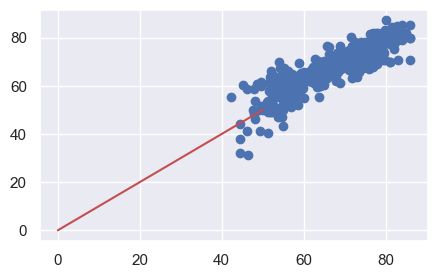

In [22]:
Yth = l_regression.predict(xval)
plt.scatter(yval, Yth)
plt.plot([0,50], [0,50], 'r')
plt.show()

### Error measurement for linear regression

In [23]:
from sklearn.metrics import mean_squared_error

RMSE_train_l = mean_squared_error(ytrain, l_regression.predict(xtrain), squared = False)
print(f'Training RMSE: \t{RMSE_train_l:.5f}')
RMSE_val_l = mean_squared_error(yval, l_regression.predict(xval), squared = False)
print(f'Valid RMSE: \t{RMSE_val_l:.5f}')

Training RMSE: 	4.48676
Valid RMSE: 	4.36399


In [24]:
from sklearn.metrics import mean_absolute_error

print(f'Training MAE: \t{mean_absolute_error(ytrain, l_regression.predict(xtrain)):.5f}')
print(f'Valid MAE: \t{mean_absolute_error(yval, l_regression.predict(xval)):.5f}')

Training MAE: 	3.38042
Valid MAE: 	3.27311


## Using Ridge regression model implemented in `scikit-learn`
In Ridge Regression I construct at Kernel Matrix which contains the similarities between all of my training labels. The parameters of the Ridge Regression fit are found from both this Kernel Matrix and my training labels. If I have e.g. two samples that are extremely similar, the matrix to be solved will be over determined. To get around this, a small value can be added to the diagonal, and that value is the alpha parameter that I have. So what happens is that when alpha value approaches 0, the matrix is more likely to be over determined.

Seeing that I get warnings - in order to make the result more visible, I import `warnings`. 
In further work, I will try Ridge model with normalization.

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
from sklearn.linear_model import Ridge
r_regression = Ridge(1)
r_regression.fit(xtrain, ytrain)

Ridge(alpha=1)

In [27]:
RMSE_train_r = mean_squared_error(ytrain, r_regression.predict(xtrain), squared = False)
print(f'Training RMSE: \t{RMSE_train_r:.5f}')
RMSE_val_r = mean_squared_error(yval, r_regression.predict(xval), squared = False)
print(f'Valid RMSE: \t{RMSE_val_r:.5f}')

Training RMSE: 	4.48678
Valid RMSE: 	4.36371


In [28]:
print(f'Training MAE: \t{mean_absolute_error(ytrain, r_regression.predict(xtrain)):.5f}')
print(f'Valid MAE: \t{mean_absolute_error(yval, r_regression.predict(xval)):.5f}')

Training MAE: 	3.37992
Valid MAE: 	3.27274


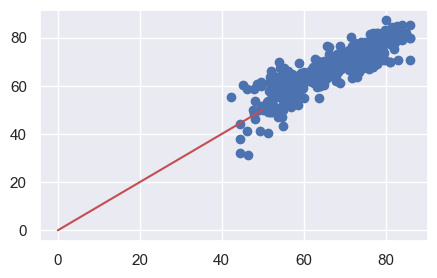

In [29]:
plt.scatter(yval, r_regression.predict(xval))
plt.plot([0,50], [0,50], 'r')
plt.show()

## Compare the predictions of the two regression models.

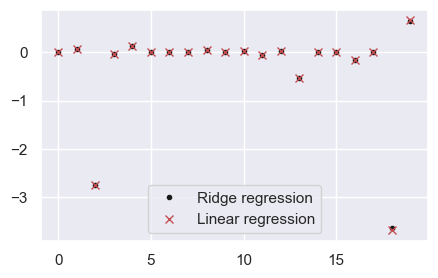

In [30]:
plt.plot(r_regression.coef_, 'k.', label='Ridge regression')
plt.plot(l_regression.coef_, 'rx', label='Linear regression')
plt.legend()
plt.show()

* Both regression models make predictions with about the same accuracy.

### Tuning of ridge regression hyperparameters
I'll try to improve Ridge model finding best fitting hyperparameters.

In [31]:
from scipy import optimize

def get_opt_ridge_model(xtrain, xval):
    def ridgemodel_eval(alpha):
        clf = Ridge(alpha=alpha)
        clf.fit(xtrain, ytrain)
        return mean_squared_error(yval, clf.predict(xval), squared = False)

    alphas = np.linspace(1,500,100)
    alphas_res = [ridgemodel_eval(alpha) for alpha in alphas]
    plt.plot(alphas, alphas_res, '.')
    plt.show()

    # Find Ridge alpha automatically
    opt_alpha = optimize.minimize_scalar(ridgemodel_eval, options = {'maxiter': 30}, method = 'bounded', bounds=(0.1, 400))
    print('Optimal alpha', opt_alpha)
    print('\n')

    clf_opt_ridge = Ridge(alpha = opt_alpha.x)
    clf_opt_ridge.fit(xtrain, ytrain)
    return clf_opt_ridge

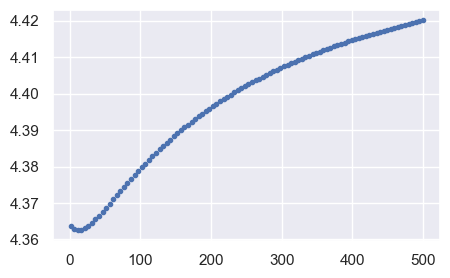

Optimal alpha      fun: 4.362518082349369
 message: 'Solution found.'
    nfev: 17
     nit: 17
  status: 0
 success: True
       x: 11.639362210226363


Training RMSE: 	4.48842
Valid RMSE: 	4.36252
Training MAE: 	3.37670
Valid MAE: 	3.27016


In [32]:
clf_opt_ridge = get_opt_ridge_model(xtrain, xval)


RMSE_train_opt_ridge = mean_squared_error(ytrain, clf_opt_ridge.predict(xtrain), squared = False)
print(f'Training RMSE: \t{RMSE_train_opt_ridge:.5f}')
RMSE_val_opt_ridge = mean_squared_error(yval, clf_opt_ridge.predict(xval), squared = False)
print(f'Valid RMSE: \t{RMSE_val_opt_ridge:.5f}')

print(f'Training MAE: \t{mean_absolute_error(ytrain, clf_opt_ridge.predict(xtrain)):.5f}')
print(f'Valid MAE: \t{mean_absolute_error(yval, clf_opt_ridge.predict(xval)):.5f}')

## Compare the predictions of the three regression models.

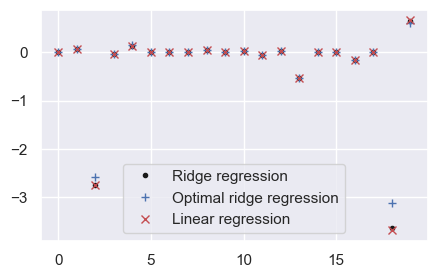

In [33]:
plt.plot(r_regression.coef_, 'k.', label='Ridge regression')
plt.plot(clf_opt_ridge.coef_, 'b+', label='Optimal ridge regression')
plt.plot(l_regression.coef_, 'rx', label='Linear regression')
plt.legend()
plt.show()

* May notice, that all 3 regression models make predictions with about the same accuracy.

### Standardization
I'll try using the `Standardization` method to improve the prediction of the Ridge regression model.

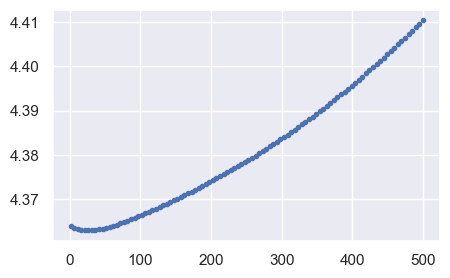

Optimal alpha      fun: 4.36292550718453
 message: 'Solution found.'
    nfev: 14
     nit: 14
  status: 0
 success: True
       x: 25.766233115677043


Training RMSE: 	4.48871
Valid RMSE: 	4.36293
Training MAE: 	3.38228
Valid MAE: 	3.27658


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(xtrain)

xtrain_sc = scaler.transform(xtrain)
xval_sc = scaler.transform(xval)
xtest_sc = scaler.transform(xtest)

clf_std_ridge = get_opt_ridge_model(xtrain_sc, xval_sc)

RMSE_train_std_ridge = mean_squared_error(ytrain, clf_std_ridge.predict(xtrain_sc), squared = False)
print(f'Training RMSE: \t{RMSE_train_std_ridge:.5f}')
RMSE_val_std_ridge = mean_squared_error(yval, clf_std_ridge.predict(xval_sc), squared = False)
print(f'Valid RMSE: \t{RMSE_val_std_ridge:.5f}')

print(f'Training MAE: \t{mean_absolute_error(ytrain, clf_std_ridge.predict(xtrain_sc)):.5f}')
print(f'Valid MAE: \t{mean_absolute_error(yval, clf_std_ridge.predict(xval_sc)):.5f}')

## Sum up better model

### Linear regression

In [35]:
print(f'Training RMSE: \t{RMSE_train_l:.5f}')
print(f'Valid RMSE: \t{RMSE_val_l:.5f}')
print('***********************')
print(f'Training MAE: \t{mean_absolute_error(ytrain, l_regression.predict(xtrain)):.5f}')
print(f'Valid MAE: \t{mean_absolute_error(yval, l_regression.predict(xval)):.5f}')

Training RMSE: 	4.48676
Valid RMSE: 	4.36399
***********************
Training MAE: 	3.38042
Valid MAE: 	3.27311


### Ridge regression

In [36]:
print(f'Training RMSE: \t{RMSE_train_r:.5f}')
print(f'Valid RMSE: \t{RMSE_val_r:.5f}')
print('***********************')
print(f'Training MAE: \t{mean_absolute_error(ytrain, r_regression.predict(xtrain)):.5f}')
print(f'Valid MAE: \t{mean_absolute_error(yval, r_regression.predict(xval)):.5f}')

Training RMSE: 	4.48678
Valid RMSE: 	4.36371
***********************
Training MAE: 	3.37992
Valid MAE: 	3.27274


### Optimal Ridge regression

In [37]:
print(f'Training RMSE: \t{RMSE_train_opt_ridge:.5f}')
print(f'Valid RMSE: \t{RMSE_val_opt_ridge:.5f}')
print('***********************')
print(f'Training MAE: \t{mean_absolute_error(ytrain, clf_opt_ridge.predict(xtrain)):.5f}')
print(f'Valid MAE: \t{mean_absolute_error(yval, clf_opt_ridge.predict(xval)):.5f}')

Training RMSE: 	4.48842
Valid RMSE: 	4.36252
***********************
Training MAE: 	3.37670
Valid MAE: 	3.27016


### Standardized Ridge regression

In [38]:
print(f'Training RMSE: \t{RMSE_train_std_ridge:.5f}')
print(f'Valid RMSE: \t{RMSE_val_std_ridge:.5f}')
print('***********************')
print(f'Training MAE: \t{mean_absolute_error(ytrain, clf_std_ridge.predict(xtrain_sc)):.5f}')
print(f'Valid MAE: \t{mean_absolute_error(yval, clf_std_ridge.predict(xval_sc)):.5f}')

Training RMSE: 	4.48871
Valid RMSE: 	4.36293
***********************
Training MAE: 	3.38228
Valid MAE: 	3.27658


* When comparing all obtained models, I noticed that the correctness of the prediction of all models is approximately equal, and differs very insignificantly.

## Decision trees for regression

In [39]:
from sklearn.tree import DecisionTreeRegressor

depths = range(1,30)
val_metric = []
for depth in depths:
    tree_regression = DecisionTreeRegressor(max_depth = depth).fit(xtrain, ytrain)
    val_metric.append(mean_squared_error(yval, tree_regression.predict(xval), squared = False))

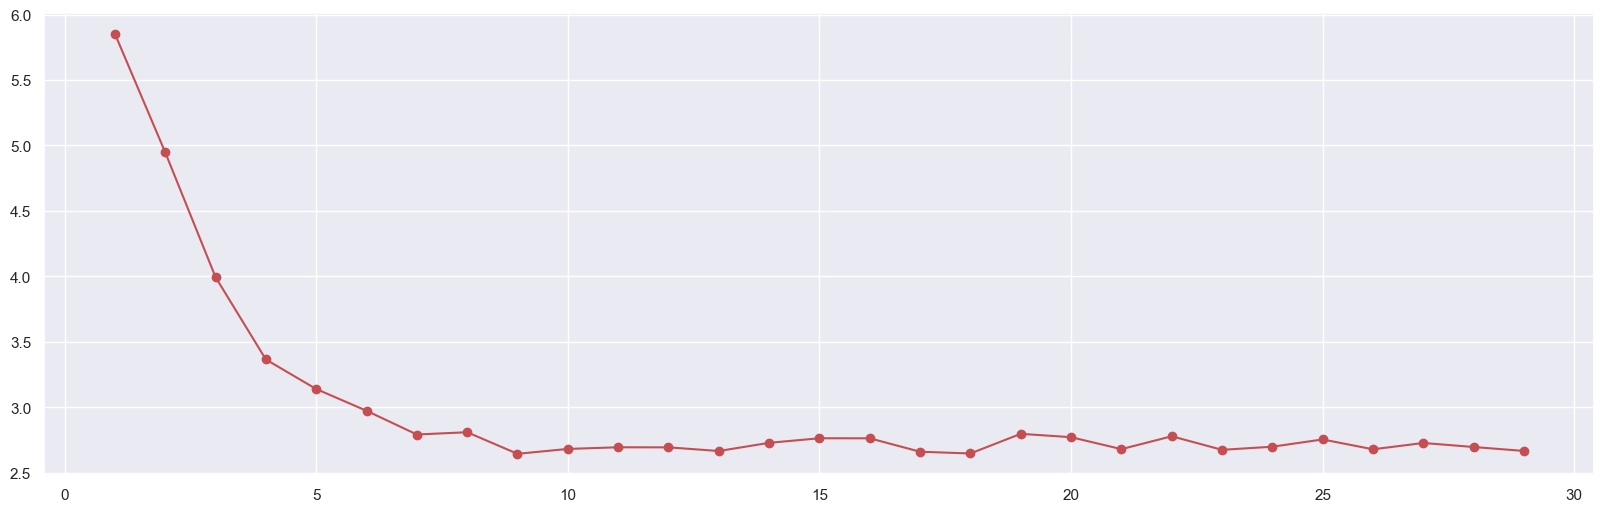

In [40]:
plt.figure(figsize=(20,6))
_ = plt.plot(depths, val_metric,'or-')

* I'll see what the prediction looks like for the best metric.

In [41]:
# Select the best parameters
best_depth = depths[np.argmin(val_metric)]

# Train DecisionTreeRegressor on them
tree_regression = DecisionTreeRegressor(max_depth = best_depth).fit(xtrain, ytrain)

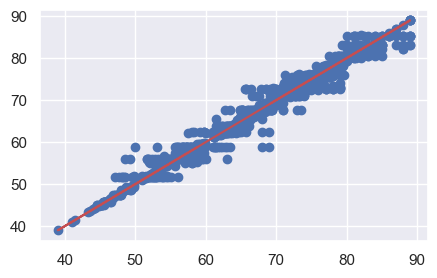

In [42]:
plt.scatter(ytrain,tree_regression.predict(xtrain))
_ = plt.plot(ytrain,ytrain,'r')

In [43]:
RMSE_train_tree = mean_squared_error(ytrain,  tree_regression.predict(xtrain), squared = False)
RMSE_val_tree = mean_squared_error(yval,  tree_regression.predict(xval), squared = False)
print(f'Training RMSE: \t{RMSE_train_tree:.5f}')
print(f'Valid RMSE: \t{RMSE_val_tree:.5f}')
print('***********************')
print(f'Training MAE: \t{mean_absolute_error(ytrain, tree_regression.predict(xtrain)):.5f}')
print(f'Valid MAE: \t{mean_absolute_error(yval, tree_regression.predict(xval)):.5f}')

Training RMSE: 	1.50110
Valid RMSE: 	2.65852
***********************
Training MAE: 	0.91371
Valid MAE: 	1.79057


### RandomForest
Now I try the `RandomForestRegressor` model which is a random forest for regression.

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid
import sklearn.metrics as metrics

param_grid_forest = {
    'n_estimators': range(5, 40, 5),
    'max_depth': range(1, 8)
}

param_comb_forest = ParameterGrid(param_grid_forest)

val_metric_forest = []
for params in param_comb_forest:
    forest_regression = RandomForestRegressor(**params, random_state = 42).fit(xtrain, ytrain)
    val_metric_forest.append(metrics.mean_squared_error(yval, forest_regression.predict(xval), squared = False))
    
best_params_forest = param_comb_forest[np.argmin(val_metric_forest)]

In [45]:
print('Found the best params: ' + str(best_params_forest))

RMSE_train_forest = mean_squared_error(ytrain,  forest_regression.predict(xtrain), squared = False)
RMSE_val_forest = mean_squared_error(yval,  forest_regression.predict(xval), squared = False)
print(f'Training RMSE: \t{RMSE_train_forest:.5f}')
print(f'Valid RMSE: \t{RMSE_val_forest:.5f}')
print('***********************')
print(f'Training MAE: \t{mean_absolute_error(ytrain, forest_regression.predict(xtrain)):.5f}')
print(f'Valid MAE: \t{mean_absolute_error(yval, forest_regression.predict(xval)):.5f}')

Found the best params: {'n_estimators': 25, 'max_depth': 7}
Training RMSE: 	1.67495
Valid RMSE: 	2.00056
***********************
Training MAE: 	1.15575
Valid MAE: 	1.40978


I see that the correctness of prediction in the `RandomForestRegressor` model is higher than in previous models.

## KNN for regression
I will try to implement another model.

In [46]:
from sklearn.neighbors import KNeighborsRegressor

KNN_regression = KNeighborsRegressor(n_neighbors=5)
KNN_regression.fit(xtrain, ytrain)

KNeighborsRegressor()

In [47]:
RMSE_train_knn = mean_squared_error(ytrain, KNN_regression.predict(xtrain), squared = False)
RMSE_val_knn = mean_squared_error(yval, KNN_regression.predict(xval), squared = False)
print(f'Training RMSE: \t{RMSE_train_knn:.5f}')
print(f'Valid RMSE: \t{RMSE_val_knn:.5f}')
print('***********************')
print(f'Training MAE: \t{mean_absolute_error(ytrain, KNN_regression.predict(xtrain)):.5f}')
print(f'Valid MAE: \t{mean_absolute_error(yval, KNN_regression.predict(xval)):.5f}')

Training RMSE: 	7.13748
Valid RMSE: 	8.94906
***********************
Training MAE: 	5.29231
Valid MAE: 	6.70102


* See that the correctness of the guess is low. I will try to use `normalization`.


### Normalization

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
xtrain_scaler = pd.DataFrame(scaler.fit_transform(xtrain), index=xtrain.index, columns=xtrain.columns)
xval_scaler = pd.DataFrame(scaler.transform(xval), index=xval.index, columns=xval.columns)
xtest_scaler = pd.DataFrame(scaler.transform(xtest), index=xtest.index, columns=xtest.columns)

In [49]:
# Trening model
KNN_n_regression = KNeighborsRegressor(n_neighbors=5)
KNN_n_regression.fit(xtrain_scaler, ytrain)

RMSE_train_knn_n = mean_squared_error(ytrain, KNN_n_regression.predict(xtrain_scaler), squared = False)
RMSE_val_knn_n = mean_squared_error(yval, KNN_n_regression.predict(xval_scaler), squared = False)
print(f'Training RMSE: \t{RMSE_train_knn_n:.5f}')
print(f'Valid RMSE: \t{RMSE_val_knn_n:.5f}')
print('***********************')
print(f'Training MAE: \t{mean_absolute_error(ytrain, KNN_n_regression.predict(xtrain_scaler)):.5f}')
print(f'Valid MAE: \t{mean_absolute_error(yval, KNN_n_regression.predict(xval_scaler)):.5f}')

Training RMSE: 	2.80716
Valid RMSE: 	3.21681
***********************
Training MAE: 	1.95741
Valid MAE: 	2.31672


* The normalization has greatly improved the KNN regression model.

### Grid search
I will try to improve the result by searching for the best hyperparameters for the model.
* `GridSearchCV` is also known as `GridSearch cross-validation`: an internal cross-validation technique is used to calculate the score for each combination of parameters on the grid.

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'n_neighbors': range(3, 35),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
KNN_n_regression_grid = GridSearchCV(estimator=KNN_n_regression, param_grid=param_grid_knn)
KNN_n_regression_grid.fit(xtrain_scaler, ytrain)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(3, 35),
                         'weights': ['uniform', 'distance']})

In [51]:
print('Best tuned hyperparameters:', KNN_n_regression_grid.best_params_)

Best tuned hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [52]:
KNN_n_regression_grid.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsRegressor(),
 'n_jobs': None,
 'param_grid': {'n_neighbors': range(3, 35),
  'weights': ['uniform', 'distance'],
  'metric': ['euclidean', 'manhattan', 'minkowski']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [53]:
KNN_n_regression_grid = KNeighborsRegressor(**KNN_n_regression_grid.best_params_)
KNN_n_regression_grid.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'manhattan',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'distance'}

In [54]:
KNN_n_regression_grid.fit(xtrain_scaler, ytrain)

KNeighborsRegressor(metric='manhattan', n_neighbors=3, weights='distance')

In [55]:
RMSE_train_knn_n_grid = mean_squared_error(ytrain, KNN_n_regression_grid.predict(xtrain_scaler), squared = False)
RMSE_val_knn_n_grid = mean_squared_error(yval, KNN_n_regression_grid.predict(xval_scaler), squared = False)
print(f'Training RMSE: \t{RMSE_train_knn_n_grid:.5f}')
print(f'Valid RMSE: \t{RMSE_val_knn_n_grid:.5f}')
print('***********************')
print(f'Training MAE: \t{mean_absolute_error(ytrain, KNN_n_regression_grid.predict(xtrain_scaler)):.5f}')
print(f'Valid MAE: \t{mean_absolute_error(yval, KNN_n_regression_grid.predict(xval_scaler)):.5f}')

Training RMSE: 	0.00000
Valid RMSE: 	2.24319
***********************
Training MAE: 	0.00000
Valid MAE: 	1.40232


* This model is one of the few that received a low `RMSE` and `MAE`, I've received so far. But it's still a bit inferior to the **random forest model** due to `RMSE`. This model has come with `overfitting` in Training set.

## Bottom line
Finally, I'll select the best model (`relative to RMSE`) and estimate what RMSE and MAE I can expect on the new data that I did not have so far.
* My best model is `Random Forest Regression`.

In [56]:
RMSE_test_forest = mean_squared_error(ytest, forest_regression.predict(xtest), squared = False)
print(f'Expecting Testing RMSE: {RMSE_test_forest:.5f}')
print('*******************************')
print(f'Expecting Testing MAE: \t{mean_absolute_error(ytest, forest_regression.predict(xtest)):.5f}')

Expecting Testing RMSE: 2.36563
*******************************
Expecting Testing MAE: 	1.60401


Finally, I would like to measure `The coefficient of determination` - R2 (the coefficient "R squared") expresses what proportion of the variability in the target variable.
* The best possible score is 1 which is obtained when the predicted values are the same as the actual values.

In [57]:
from sklearn.metrics import r2_score
r2_score(ytest, forest_regression.predict(xtest))

0.9419510228864769

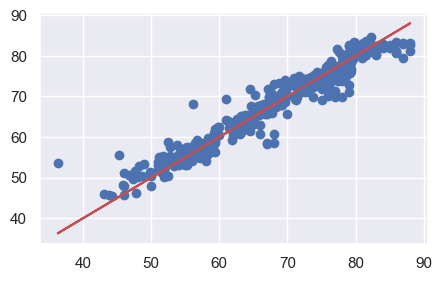

In [58]:
plt.scatter(ytest,forest_regression.predict(xtest))
_ = plt.plot(ytest,ytest,'r')